In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from numpy.fft import fft, fftfreq, ifft
import pandas as pd

from scipy.fftpack import *
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

#from scipy import signal
#from eofs.standard import Eof

#plt.rcParams['font.family'] = 'deJavu Sans'
#plt.rcParams['font.size'] = 35 #22
#plt.rcParams['font.weight'] = 'bold' #22
#plt.rcParams['figure.figsize'] = [35,10]
import matplotlib.ticker as ticker

In [7]:
pcs=xr.open_dataset("D:/analisis rr/Atika_PC1.nc")
pcs

<xarray.Dataset>
Dimensions:     (time: 480, latitude: 281, longitude: 841)
Coordinates:
  * time        (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
  * latitude    (latitude) float32 35.0 34.75 34.5 34.25 ... -34.5 -34.75 -35.0
  * longitude   (longitude) float32 40.0 40.25 40.5 40.75 ... 249.5 249.8 250.0
Data variables:
    rr_spasial  (time, latitude, longitude) float64 ...
Attributes:
    RR:       Data Rata Rata Stasiun

In [8]:
ds_sst_slp_wind_era5=xr.open_dataset("D:/analisis rr/S3/FULL_LONG-1940-2022-ver1-5-XX.nc")

t_start='1983-01-01'
t_stop='2022-12-01'

min_lon = 40 
max_lon = 250 
min_lat = -35 
max_lat = 35

#ds_uwind_sel = ds_uwind.sel(time=slice(t_start, t_stop), lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#ds_vwind_sel = ds_vwind.sel(time=slice(t_start, t_stop), lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#ds_slp_sel = ds_slp.sel(time=slice(t_start, t_stop), lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
ds_era5_sel = ds_sst_slp_wind_era5.sel(time=slice(t_start, t_stop), latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
#ds_era5_sel

#ds_era5_sel_climo = ds_era5_sel.groupby('time.month').mean('time')
#ds_era5_sel_anoms = (ds_era5_sel.groupby('time.month') - ds_era5_sel_climo)

In [11]:
ds_era5_sel

<xarray.Dataset>
Dimensions:    (time: 480, latitude: 281, longitude: 841)
Coordinates:
  * longitude  (longitude) float32 40.0 40.25 40.5 40.75 ... 249.5 249.8 250.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-10 06:55:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# BUAT SEASON (ASO dan NDJ) UNTUK MASING-MASING DATA

In [14]:
s_y=1983
e_y=2023

s_ASO='-08'
e_ASO='-10'
list_sASO=[]#str(s_y)+'-01']
list_eASO=[]#str(s_y)+'-02']
list_sesASO=[]

for yr in range(s_y,e_y):
    list_sASO.append(str(yr)+s_ASO)
    list_eASO.append(str(yr)+e_ASO)
    list_sesASO.append('ASO'+str(yr))
    
#list_sJJA.append(np.nan)
#list_eJJA.append(np.nan)
#list_sesJJA.append(np.nan)


s_NDJ='-11'
e_NDJ='-01'
list_sNDJ=[]#str(s_y)+'-01']
list_eNDJ=[]#str(s_y)+'-02']
list_sesNDJ=[]

for yr in range(s_y,e_y):
    list_sNDJ.append(str(yr)+s_NDJ)
    if (yr==(e_y-1)):
        list_eNDJ.append(str(yr)+'-12')
    else:
        list_eNDJ.append(str(yr+1)+e_NDJ)
    list_sesNDJ.append('NDJ'+str(yr))
    
#list_sNDJ.append(np.nan)
#list_eNDJ.append(np.nan)
#list_sesNDJ.append(np.nan)
    
df_list=pd.DataFrame(list(zip(list_sASO,list_eASO,list_sesASO,
                              list_sNDJ,list_eNDJ,list_sesNDJ)),columns=['sASO','eASO','sesASO',
                                                             'sNDJ','eNDJ','sesNDJ'])
df_list

,sASO,eASO,sesASO,sNDJ,eNDJ,sesNDJ
0,1983-08,1983-10,ASO1983,1983-11,1984-01,NDJ1983
1,1984-08,1984-10,ASO1984,1984-11,1985-01,NDJ1984
2,1985-08,1985-10,ASO1985,1985-11,1986-01,NDJ1985
3,1986-08,1986-10,ASO1986,1986-11,1987-01,NDJ1986
4,1987-08,1987-10,ASO1987,1987-11,1988-01,NDJ1987
5,1988-08,1988-10,ASO1988,1988-11,1989-01,NDJ1988
6,1989-08,1989-10,ASO1989,1989-11,1990-01,NDJ1989
7,1990-08,1990-10,ASO1990,1990-11,1991-01,NDJ1990
8,1991-08,1991-10,ASO1991,1991-11,1992-01,NDJ1991
9,1992-08,1992-10,ASO1992,1992-11,1993-01,NDJ1992


# SEASON data SST 

In [15]:
d1=ds_era5_sel.sel(time=slice(df_list.iloc[0]['sASO'], df_list.iloc[0]['eASO'])).mean(dim='time')
d11 = d1.assign_coords({'season':df_list.iloc[0]['sesASO']})
seas_SST_ASO_TS = d11.expand_dims({"season": 1})
for i in range(len(df_list)):
    d1=ds_era5_sel.sel(time=slice(df_list.iloc[i]['sASO'], df_list.iloc[i]['eASO'])).mean(dim='time')
    d11 = d1.assign_coords({'season':df_list.iloc[i]['sesASO']})
    d111 = d11.expand_dims({"season": 1})
    seas_SST_ASO_TS=xr.merge([seas_SST_ASO_TS, d111], compat="no_conflicts", join="outer")

In [16]:
d2=ds_era5_sel.sel(time=slice(df_list.iloc[0]['sNDJ'], df_list.iloc[0]['eNDJ'])).mean(dim='time')
d22 = d2.assign_coords({'season':df_list.iloc[0]['sesNDJ']})
seas_SST_NDJ_TS = d22.expand_dims({"season": 1})
for i in range(1,len(df_list)-1):
    d2=ds_era5_sel.sel(time=slice(df_list.iloc[i]['sNDJ'], df_list.iloc[i]['eNDJ'])).mean(dim='time')
    d22 = d2.assign_coords({'season':df_list.iloc[i]['sesNDJ']})
    d222 = d22.expand_dims({"season": 1})
    seas_SST_NDJ_TS=xr.merge([seas_SST_NDJ_TS, d222], compat="no_conflicts", join="outer")

# SEASON PC

In [18]:
d5=pcs.sel(time=slice(df_list.iloc[0]['sASO'], df_list.iloc[0]['eASO'])).mean(dim='time')
d55 = d5.assign_coords({'season':df_list.iloc[0]['sesASO']})
seas_PC_ASO_TS = d55.expand_dims({"season": 1})
for i in range(len(df_list)):
    d5=pcs.sel(time=slice(df_list.iloc[i]['sASO'], df_list.iloc[i]['eASO'])).mean(dim='time')
    d55 = d5.assign_coords({'season':df_list.iloc[i]['sesASO']})
    d555 = d55.expand_dims({"season": 1})
    seas_PC_ASO_TS=xr.merge([seas_PC_ASO_TS, d555], compat="no_conflicts", join="outer")

In [19]:
d6=pcs.sel(time=slice(df_list.iloc[0]['sNDJ'], df_list.iloc[0]['eNDJ'])).mean(dim='time')
d66 = d6.assign_coords({'season':df_list.iloc[0]['sesNDJ']})
seas_PC_NDJ_TS = d66.expand_dims({"season": 1})
for i in range(len(df_list)):
    d6=pcs.sel(time=slice(df_list.iloc[i]['sNDJ'], df_list.iloc[i]['eNDJ'])).mean(dim='time')
    d66 = d6.assign_coords({'season':df_list.iloc[i]['sesNDJ']})
    d666 = d66.expand_dims({"season": 1})
    seas_PC_NDJ_TS=xr.merge([seas_PC_NDJ_TS, d666], compat="no_conflicts", join="outer")

# HITUNG KORELASI

In [29]:
from scipy.stats import t
import math as mt
import numpy as np
def val_p_val(r,n,sig_lev):
    if(np.isnan(r)):
        return np.nan
    else:
        p_tabel=1-sig_lev
        t_hit = (r*mt.sqrt((n-2))) / mt.sqrt((1-r**2))
        dff=n-2
        pval=(1 - t.cdf(x=t_hit, df=dff))*2
        if (pval>p_tabel):
            return r
        else:
            return np.nan

In [30]:
cor_pc1_sst=xr.corr(pcs.rr_spasial, ds_era5_sel.sst-273, dim='time')
cor_pc1_sst

<xarray.DataArray (latitude: 281, longitude: 841)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.68118008, 0.67972068, 0.67891765, ..., 0.69490487, 0.69182725,
        0.68809003],
       [0.67789748, 0.67609157, 0.67539895, ..., 0.69740754, 0.69450835,
        0.69112795],
       [0.67476611, 0.67288923, 0.67304048, ..., 0.70010945, 0.69821786,
        0.69533064]])
Coordinates:
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... -34.5 -34.75 -35.0
  * longitude  (longitude) float32 40.0 40.25 40.5 40.75 ... 249.5 249.8 250.0

Text(0.5, 1.0, 'Correlation of SM Eltari Rainfall and SST')

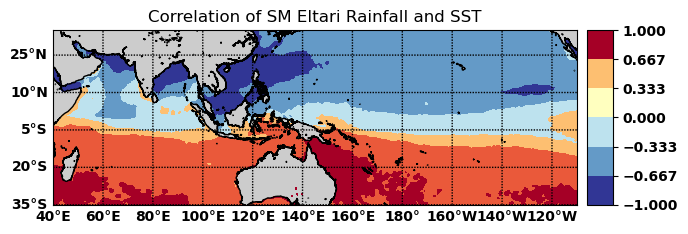

In [31]:
plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 10 #22
plt.rcParams['font.weight'] = 'bold' #22
# create new figure, axes instances.
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat,\
            resolution='i', projection='cyl')

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(min_lat,max_lat,15),labels=[1,0,0,0])
# draw meridians
m.drawmeridians(np.arange(min_lon,max_lon,20),labels=[0,0,0,1])
###################################################################
###################################################################
sekmen=7
#max_sst=cor_pc1_sst.max().values*1
#min_sst=cor_pc1_sst.min().values*1
max_sst=1
min_sst=-1
px,py = np.meshgrid(cor_pc1_sst['longitude'], cor_pc1_sst['latitude'])
levels1 = np.linspace(min_sst, max_sst, sekmen)

x, y = m(px, py)

cmap = plt.get_cmap('RdYlBu_r', sekmen)

m.contourf(x, y, cor_pc1_sst, cmap = cmap, levels=levels1, vmin = min_sst, vmax = max_sst)
bounds = [-4,-2,-1.0, -0.5, 0.5, 1.0,2,4]
norm = mpl.colors.BoundaryNorm(levels1, cmap.N)
m.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #cax=cax,
    #extend='both',
    extendfrac='auto',
    ticks=levels1,
    spacing='uniform',
    shrink=0.2, pad=0.1
)
plt.title("Correlation of SM Eltari Rainfall and SST")

Text(0.5, 1.0, 'Correlation of SM Eltari Rainfall and SST')

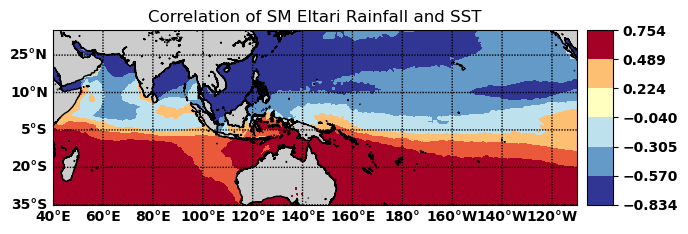

In [32]:
plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 10 #22
plt.rcParams['font.weight'] = 'bold' #22
# create new figure, axes instances.
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat,\
            resolution='i', projection='cyl')

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(min_lat,max_lat,15),labels=[1,0,0,0])
# draw meridians
m.drawmeridians(np.arange(min_lon,max_lon,20),labels=[0,0,0,1])
###################################################################
###################################################################
sekmen=7
max_sst=cor_pc1_sst.max().values*1
min_sst=cor_pc1_sst.min().values*1
px,py = np.meshgrid(cor_pc1_sst['longitude'], cor_pc1_sst['latitude'])
levels1 = np.linspace(min_sst, max_sst, sekmen)

x, y = m(px, py)

cmap = plt.get_cmap('RdYlBu_r', sekmen)

m.contourf(x, y, cor_pc1_sst, cmap = cmap, levels=levels1, vmin = min_sst, vmax = max_sst)
bounds = [-4,-2,-1.0, -0.5, 0.5, 1.0,2,4]
norm = mpl.colors.BoundaryNorm(levels1, cmap.N)
m.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #cax=cax,
    #extend='both',
    extendfrac='auto',
    ticks=levels1,
    spacing='uniform',
    shrink=0.2, pad=0.1
)
plt.title("Correlation of SM Eltari Rainfall and SST")

In [33]:
n_all=len(ds_era5_sel.time)
sig_lev=0.95
for i in range(len(cor_pc1_sst.latitude)):
    for j in range(len(cor_pc1_sst.longitude)):
        r=cor_pc1_sst[i][j]
        cor_pc1_sst[i][j]=val_p_val(r,n_all,sig_lev)

Text(0.5, 1.0, 'Correlation of SM Eltari Rainfall and SST (sig.0.95)')

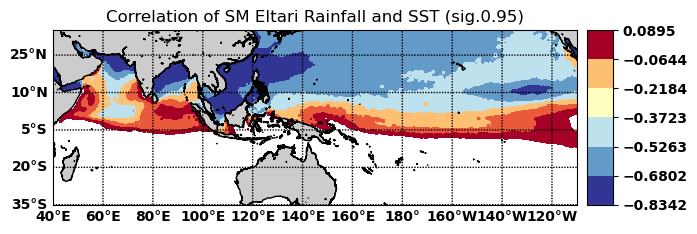

In [34]:
plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 10 #22
plt.rcParams['font.weight'] = 'bold' #22
# create new figure, axes instances.
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat,\
            resolution='i', projection='cyl')

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(min_lat,max_lat,15),labels=[1,0,0,0])
# draw meridians
m.drawmeridians(np.arange(min_lon,max_lon,20),labels=[0,0,0,1])
###################################################################
###################################################################
sekmen=7
max_sst=cor_pc1_sst.max().values*1
min_sst=cor_pc1_sst.min().values*1
px,py = np.meshgrid(cor_pc1_sst['longitude'], cor_pc1_sst['latitude'])
levels1 = np.linspace(min_sst, max_sst, sekmen)

x, y = m(px, py)

cmap = plt.get_cmap('RdYlBu_r', sekmen)

m.contourf(x, y, cor_pc1_sst, cmap = cmap, levels=levels1, vmin = min_sst, vmax = max_sst)
bounds = [-4,-2,-1.0, -0.5, 0.5, 1.0,2,4]
norm = mpl.colors.BoundaryNorm(levels1, cmap.N)
m.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #cax=cax,
    #extend='both',
    extendfrac='auto',
    ticks=levels1,
    spacing='uniform',
    shrink=0.2, pad=0.1
)
plt.title("Correlation of SM Eltari Rainfall and SST (sig.0.95)")

Text(0.5, 1.0, 'Correlation of SM Eltari Rainfall and SST (sig.0.95)')

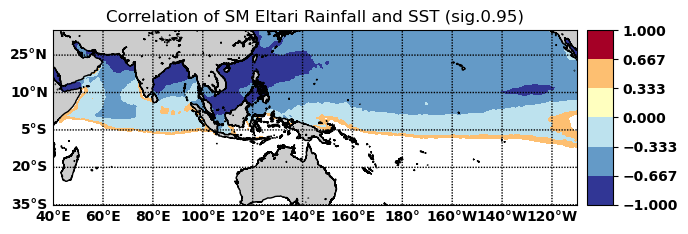

In [35]:
plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 10 #22
plt.rcParams['font.weight'] = 'bold' #22
# create new figure, axes instances.
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat,\
            resolution='i', projection='cyl')

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(min_lat,max_lat,15),labels=[1,0,0,0])
# draw meridians
m.drawmeridians(np.arange(min_lon,max_lon,20),labels=[0,0,0,1])
###################################################################
###################################################################
sekmen=7
max_sst=1
min_sst=-1
px,py = np.meshgrid(cor_pc1_sst['longitude'], cor_pc1_sst['latitude'])
levels1 = np.linspace(min_sst, max_sst, sekmen)

x, y = m(px, py)

cmap = plt.get_cmap('RdYlBu_r', sekmen)

m.contourf(x, y, cor_pc1_sst, cmap = cmap, levels=levels1, vmin = min_sst, vmax = max_sst)
bounds = [-4,-2,-1.0, -0.5, 0.5, 1.0,2,4]
norm = mpl.colors.BoundaryNorm(levels1, cmap.N)
m.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    #cax=cax,
    #extend='both',
    extendfrac='auto',
    ticks=levels1,
    spacing='uniform',
    shrink=0.2, pad=0.1
)
plt.title("Correlation of SM Eltari Rainfall and SST (sig.0.95)")